# Implementing Regression


Regression Implementation. Consider the training dataset
{(0.10, 0.65),(0.50, 0.10),(0.90, 0.35),(−0.20, 0.17),(−0.5, 0.42),(1.50, 2.62)},
where in (·, ·), the first entry is the input variable, x, and the second entry is the output variable
(response), y. Consider the regression model y = θ1x + θ0.
1. Write a python code that inputs the above data and outputs the optimal regression value
(θ
∗
1
, θ∗
0
), using the closed-form solution.
2. Plot the data in 2D and plot the estimated line y = θ
∗
1x + θ
∗
0
.
3. Remove the last point, i.e., (1.50,2.62), from the data and repeat the previous part. Is the new
estimated line close to the estimated line in the previous part? Provide a justification.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plotGraph(x, y, gName, arrowV=False, XC=None, YC=None, res=False):
  '''
    gName : is to provide the name to graph drawn
    arrowV : If arrow between consecutive points are needed set it to True
  '''
  if res == True:
    plt.plot(XC, YC, label="Line")
    plt.plot()
  plt.xlabel("x axis")
  plt.ylabel("y axis")
  plt.title(gName)
  plt.plot(x, y, 'r*')
  plt.axis([-1, 3, -2, +5])
  if arrowV:
    plt.quiver(x[:-1], y[:-1], np.array(x[1:])-np.array(x[:-1]), np.array(y[1:])-np.array(y[:-1]), scale_units='xy', angles='xy', scale=1)
  plt.legend()
  plt.show()

# Calculating the theta* using Closed form

In [3]:
def calTheta(Xv, Yv):
  #Closed Form is (XT*X)^-1*XT*Yx
  XT = Xv.T
  temp = XT.dot(Xv)
  inv = np.linalg.inv(temp)
  temp = inv.dot(XT)
  res = temp.dot(Yv)
  return res

# Generating Value of Y, with X and theta

In [4]:
def equVal(x, theta):
  '''
    To generate value of Y at point x and with theta
  '''
  return (x*theta[0] + theta[1])

In [5]:
def generateNewY(X, res):
  xX = []
  yY = []
  for x in X:
    xX.append(x)
    yY.append(equVal(x, res))
  return xX, yY


# Initial Setup

No handles with labels found to put in legend.


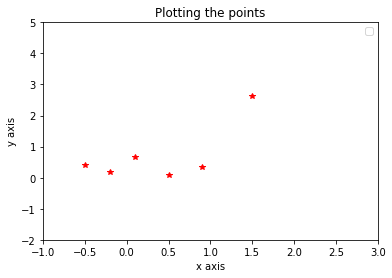

In [6]:
#As we have Thera0 we have to add extra column to X to go about the equation
X = np.array([[0.10,1],[0.50,1],[0.90,1],[-0.20,1],[-0.5,1],[1.50,1]])
Y = np.array([0.65,0.10,0.35,0.17,0.42,2.62])
plotGraph(X[:,0],Y,"Plotting the points")

[0.1, 0.5, 0.9, -0.2, -0.5, 1.5]
[0.46246792913866835, 0.8236896762370188, 1.1849114233353695, 0.19155161881490546, -0.07936469150885739, 1.726744043982895]
[0.65 0.1  0.35 0.17 0.42 2.62]


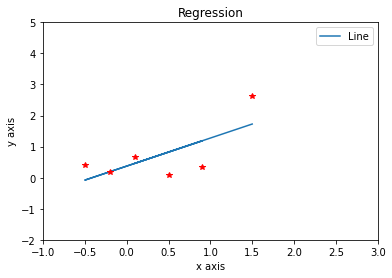

In [7]:
xX, yY = generateNewY(X[:,0], calTheta(X,Y))
print(xX)
print(yY)
print(Y)
plotGraph(X[:,0],Y,"Regression", False, xX,yY, True)


# Removing the last point

In [ ]:
xX, yY = generateNewY(X[:-1,0], calTheta(X[:-1], Y[:-1]))
print(xX)
print(yY)
print(Y[:-1])
plotGraph(X[:,0],Y,"Regression", False, xX,yY, True)
#Plotting the removed point as well for clarity and showing it as outlier


# Justification

### The estimated line after removing the last point is different from the one if the point (1.50, 2.62) is included. That's because the point (1.50, 2.62) is an outlier and to reduce the error the estimated line moves closer to the point (1.50, 2.62). When removed it no more has to account for outlier thereby providing a better function.